In [1]:
# https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-outcomes-and

In [2]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Only using data from one large shelter so that adoption policies and strategies are the same 
austin_raw_data = pd.read_csv('raw_data/aac_intakes_outcomes.csv')

# 1. Selecting columns and dogs as animal type

In [4]:
austin_raw_data.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days'],
      dtype='object')

In [5]:
#how many animal types are included?
austin_raw_data['animal_type'].unique()

array(['Dog', 'Cat', 'Other', 'Bird'], dtype=object)

In [6]:
#only select dogs
austin_data = austin_raw_data[austin_raw_data['animal_type'] == 'Dog']
austin_data.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [7]:
austin_data['animal_type'].unique()

array(['Dog'], dtype=object)

In [8]:
#drop redundant, irrelevant or columns missing many values (outcome_subtype)
new_columns = ['outcome_type', 'animal_id_intake', 'age_upon_outcome_(years)','outcome_datetime','outcome_monthyear',  'animal_type', 'breed', 'color',
       'intake_condition', 'intake_type', 'sex_upon_outcome', 'age_upon_intake_(years)','intake_datetime', 'intake_monthyear',
       'time_in_shelter_days'] 

In [9]:
austin_data = austin_data.loc[:, new_columns]
austin_data.head()

,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,time_in_shelter_days
0,Return to Owner,A006100,10.0,2017-12-07 14:07:00,2017-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,10.0,2017-12-07 00:00:00,2017-12,0.588194
1,Return to Owner,A006100,7.0,2014-12-20 16:35:00,2014-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,7.0,2014-12-19 10:21:00,2014-12,1.259722
2,Return to Owner,A006100,6.0,2014-03-08 17:10:00,2014-03,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,6.0,2014-03-07 14:26:00,2014-03,1.113889
3,Transfer,A047759,10.0,2014-04-07 15:12:00,2014-04,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,10.0,2014-04-02 15:55:00,2014-04,4.970139
4,Return to Owner,A134067,16.0,2013-11-16 11:54:00,2013-11,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,16.0,2013-11-16 09:02:00,2013-11,0.119444


In [10]:
austin_data.shape

(45366, 15)

# 2. Null values, data types, and value counts

In [11]:
austin_data.dtypes

outcome_type                 object
animal_id_intake             object
age_upon_outcome_(years)    float64
outcome_datetime             object
outcome_monthyear            object
animal_type                  object
breed                        object
color                        object
intake_condition             object
intake_type                  object
sex_upon_outcome             object
age_upon_intake_(years)     float64
intake_datetime              object
intake_monthyear             object
time_in_shelter_days        float64
dtype: object

In [12]:
austin_data['age_upon_outcome_(years)'].unique()

array([1.00000000e+01, 7.00000000e+00, 6.00000000e+00, 1.60000000e+01,
       1.50000000e+01, 1.80000000e+01, 1.40000000e+01, 1.70000000e+01,
       1.30000000e+01, 1.20000000e+01, 1.10000000e+01, 9.00000000e+00,
       8.00000000e+00, 3.00000000e+00, 1.90000000e+01, 5.00000000e+00,
       2.00000000e+01, 4.00000000e+00, 1.00000000e+00, 9.04109589e-01,
       8.21917808e-01, 2.00000000e+00, 7.39726027e-01, 5.75342466e-01,
       6.57534247e-01, 4.10958904e-01, 4.93150685e-01, 3.28767123e-01,
       1.64383562e-01, 2.46575342e-01, 8.21917808e-02, 7.67123288e-02,
       1.91780822e-02, 0.00000000e+00, 9.58904110e-02, 5.47945205e-03,
       3.83561644e-02, 2.73972603e-03, 1.36986301e-02, 1.64383562e-02,
       5.75342466e-02, 1.09589041e-02, 8.21917808e-03])

In [13]:
#rounding age columns
austin_data.loc[:,['age_upon_outcome_(years)', 'age_upon_intake_(years)']] = austin_data.loc[:,['age_upon_outcome_(years)', 'age_upon_intake_(years)']].round(1)

In [14]:
austin_data['age_upon_outcome_(years)'].unique()

array([10. ,  7. ,  6. , 16. , 15. , 18. , 14. , 17. , 13. , 12. , 11. ,
        9. ,  8. ,  3. , 19. ,  5. , 20. ,  4. ,  1. ,  0.9,  0.8,  2. ,
        0.7,  0.6,  0.4,  0.5,  0.3,  0.2,  0.1,  0. ])

In [15]:
#changing age to int
#austin_data[['age_upon_outcome_(years)', 'age_upon_intake_(years)']] = austin_data[['age_upon_outcome_(years)', 'age_upon_intake_(years)']].astype(int)

In [16]:
austin_data['outcome_type'].value_counts()

Adoption           20581
Return to Owner    13273
Transfer            9697
Euthanasia          1502
Rto-Adopt            143
Died                 142
Missing               16
Disposal              10
Name: outcome_type, dtype: int64

In [17]:
#dropping everything but adoption to avoid bias
austin_data = austin_data[austin_data['outcome_type'] == 'Adoption']

In [18]:
#finding null values
austin_data.columns[austin_data.isna().any()]

Index([], dtype='object')

# 4. Cleaning and noise reduction

In [19]:
#checking out breed column
austin_data['breed'].nunique()

1377

In [20]:
#the majority are followed by 'mix' 
austin_data['breed'].value_counts().head(30)

Labrador Retriever Mix           2368
Pit Bull Mix                     2324
Chihuahua Shorthair Mix          2270
German Shepherd Mix               922
Australian Cattle Dog Mix         607
Dachshund Mix                     390
Border Collie Mix                 352
Boxer Mix                         306
Miniature Poodle Mix              275
Catahoula Mix                     250
Australian Shepherd Mix           219
Jack Russell Terrier Mix          215
Cairn Terrier Mix                 209
Staffordshire Mix                 206
Rat Terrier Mix                   205
Pointer Mix                       197
Chihuahua Longhair Mix            188
Siberian Husky Mix                187
Yorkshire Terrier Mix             182
Beagle Mix                        173
Miniature Schnauzer Mix           172
Black Mouth Cur Mix               154
Anatol Shepherd Mix               146
Australian Kelpie Mix             141
Great Pyrenees Mix                139
Chihuahua Shorthair/Dachshund     137
American Bul

In [21]:
#taking only the first breed listed 
austin_data.loc[:,'breed'] = austin_data.loc[:,'breed'].astype(str)
austin_data.loc[:,'new_breed'] = austin_data.loc[:,'breed'].str.split("/").str[0]
austin_data.loc[:,'new_breed'] = austin_data.loc[:,'new_breed'].str.replace(' Mix', '')
austin_data['new_breed'].nunique()

186

In [22]:
austin_data['new_breed'].value_counts().head(10)

Labrador Retriever       3095
Chihuahua Shorthair      2727
Pit Bull                 2516
German Shepherd          1229
Australian Cattle Dog     785
Dachshund                 620
Border Collie             493
Boxer                     434
Miniature Poodle          349
Catahoula                 335
Name: new_breed, dtype: int64

In [23]:
#checking out colors
austin_data['color'].unique()

array(['Black/Tan', 'Tan/Black', 'Sable/White', 'Black/Brown', 'Tricolor',
       'Black/Brown Brindle', 'Brown', 'Black/White', 'Brown/Black',
       'Tan', 'Black', 'Blue', 'Brown/White', 'Red/Black', 'White/Tan',
       'White/Brown', 'White/Brown Merle', 'White/Gray',
       'Blue Tick/Brown', 'Chocolate', 'White/Tricolor', 'Tan/Buff',
       'Red/White', 'Chocolate/White', 'Brown Brindle/White',
       'Black Brindle/White', 'Cream/Black', 'White', 'Sable',
       'Tan/White', 'Buff', 'Buff/White', 'Gold', 'Black/Tricolor',
       'White/Black', 'White/Red Merle', 'Blue/White', 'Gray/Black',
       'Brown Brindle', 'White/Chocolate', 'Blue Merle', 'Red',
       'Chocolate/Tan', 'Cream/White', 'Brown Brindle/Tan',
       'White/Brown Brindle', 'White/Buff', 'Brown/Tan', 'Cream/Yellow',
       'Gray/White', 'Gray/Gold', 'Fawn/White', 'Black Tiger/White',
       'Red Tick/Red', 'Yellow', 'Brown Merle/White', 'Black Brindle',
       'Gray', 'Black Smoke/White', 'Cream', 'Blue Tiger/Wh

In [24]:
#taking only the first color listed assuming that is the primary color
austin_data.loc[:,'color'] = austin_data.loc[:,'color'].astype(str)
austin_data.loc[:,'new_color'] = austin_data.loc[:,'color'].str.split("/").str[0]

print(austin_data['new_color'].nunique(), austin_data['color'].nunique())

35 258


In [25]:
df = austin_data
#group colors that are the same (brown = chocolate = liver, yellow = fawn, etc.)
df['new_color'] = df['new_color'].astype(str)
df['new_color'] = df['new_color'].str.replace('Chocolate', 'Brown')
df['new_color'] = df['new_color'].str.replace('Liver', 'Brown')
df['new_color'] = df['new_color'].str.replace('Fawn', 'Yellow')
df['new_color'] = df['new_color'].str.replace('Silver', 'Gray')
df['new_color'] = df['new_color'].str.replace('Cream', 'White')

In [26]:
#what breeds make up roughly 80% of the rows
print(df.shape)
print(df['new_breed'].value_counts().head(27).sum())

(20581, 17)
16628


In [27]:
#taking 80% of the data by dropping the least common breeds to reduce noise(drop approx 5,840 rows)
print(df['new_breed'].value_counts().sort_values(ascending=False).head(27).sum())#top 27 represent 80%
top27 = df['new_breed'].value_counts().sort_values(ascending=False).head(27).index.tolist()
df = df[df['new_breed'].isin(top27)] #new df 
df.shape


16628


(16628, 17)

In [28]:
#what colors make up the majority of rows
df['new_color'].value_counts().head(12)

Black            4584
White            2890
Brown            2553
Tan              2105
Brown Brindle     833
Tricolor          792
Red               623
Blue              591
Yellow            379
Sable             313
Buff              179
Gray              166
Name: new_color, dtype: int64

In [29]:
#drop colors that make up less than 4% of the data

colors = ['Black', 'Blue', 'Brown', 'Brown Brindle', 'Buff', 'Gray', 'Red', 'Sable', 'Tan', 'Tricolor', 'White', 'Yellow']
df = df[df['new_color'].isin(colors)]
df['new_color'].unique() #checking all the colors left


array(['Black', 'Tan', 'Sable', 'Tricolor', 'Brown', 'Blue', 'Red',
       'White', 'Brown Brindle', 'Buff', 'Yellow', 'Gray'], dtype=object)

In [30]:
#drop original color and breed columns
df = df.drop(columns=['breed' ,'color'])

In [31]:
df['new_breed'].nunique()

27

In [32]:
df['new_color'].nunique()

12

# 5. Converting str to int and dummie variables

converting categorical variables to integers to prepare for modelling 

In [33]:
#create function to form dictonary to create int variables
def create_dict(items):
        return {v: i for i, v in enumerate(items, 0)}

In [34]:
#create variable to apply function to
condition = df['intake_condition'].unique().tolist()

In [35]:
#make dict
create_dict(condition)

{'Normal': 0,
 'Aged': 1,
 'Sick': 2,
 'Injured': 3,
 'Other': 4,
 'Pregnant': 5,
 'Nursing': 6,
 'Feral': 7}

In [36]:
#map to new column
df['intake_cond_int']=df['intake_condition'].map(create_dict(condition))
df.head()

,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,time_in_shelter_days,new_breed,new_color,intake_cond_int
12,Adoption,A200922,16.0,2013-11-22 09:44:00,2013-11,Dog,Normal,Owner Surrender,Neutered Male,16.0,2013-10-03 15:47:00,2013-10,49.747917,Dachshund,Black,0
14,Adoption,A210457,17.0,2016-10-07 12:34:00,2016-10,Dog,Aged,Public Assist,Neutered Male,17.0,2016-09-28 12:05:00,2016-09,9.020139,Chihuahua Shorthair,Tan,1
22,Adoption,A226069,15.0,2015-10-29 15:00:00,2015-10,Dog,Normal,Stray,Neutered Male,15.0,2015-10-06 12:29:00,2015-10,23.104861,Labrador Retriever,Sable,0
32,Adoption,A249087,15.0,2016-11-15 10:37:00,2016-11,Dog,Normal,Stray,Spayed Female,15.0,2016-08-17 14:05:00,2016-08,89.855556,German Shepherd,Black,0
48,Adoption,A274546,11.0,2013-11-16 12:24:00,2013-11,Dog,Normal,Stray,Spayed Female,11.0,2013-11-13 18:16:00,2013-11,2.755556,Pointer,Tricolor,0


In [37]:
#intake type to int
intake_type = df['intake_type'].unique().tolist()
create_dict(intake_type)
df['intake_type_int']=df['intake_type'].map(create_dict(intake_type))
df.head()

,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,time_in_shelter_days,new_breed,new_color,intake_cond_int,intake_type_int
12,Adoption,A200922,16.0,2013-11-22 09:44:00,2013-11,Dog,Normal,Owner Surrender,Neutered Male,16.0,2013-10-03 15:47:00,2013-10,49.747917,Dachshund,Black,0,0
14,Adoption,A210457,17.0,2016-10-07 12:34:00,2016-10,Dog,Aged,Public Assist,Neutered Male,17.0,2016-09-28 12:05:00,2016-09,9.020139,Chihuahua Shorthair,Tan,1,1
22,Adoption,A226069,15.0,2015-10-29 15:00:00,2015-10,Dog,Normal,Stray,Neutered Male,15.0,2015-10-06 12:29:00,2015-10,23.104861,Labrador Retriever,Sable,0,2
32,Adoption,A249087,15.0,2016-11-15 10:37:00,2016-11,Dog,Normal,Stray,Spayed Female,15.0,2016-08-17 14:05:00,2016-08,89.855556,German Shepherd,Black,0,2
48,Adoption,A274546,11.0,2013-11-16 12:24:00,2013-11,Dog,Normal,Stray,Spayed Female,11.0,2013-11-13 18:16:00,2013-11,2.755556,Pointer,Tricolor,0,2


In [38]:
df['sex_upon_outcome'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Female', 'Intact Male'],
      dtype=object)

In [39]:
sex_upon_outcome = df['sex_upon_outcome'].unique().tolist()
create_dict(sex_upon_outcome)
df['sex_upon_outcome_int']=df['sex_upon_outcome'].map(create_dict(sex_upon_outcome))
df.head()

,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,time_in_shelter_days,new_breed,new_color,intake_cond_int,intake_type_int,sex_upon_outcome_int
12,Adoption,A200922,16.0,2013-11-22 09:44:00,2013-11,Dog,Normal,Owner Surrender,Neutered Male,16.0,2013-10-03 15:47:00,2013-10,49.747917,Dachshund,Black,0,0,0
14,Adoption,A210457,17.0,2016-10-07 12:34:00,2016-10,Dog,Aged,Public Assist,Neutered Male,17.0,2016-09-28 12:05:00,2016-09,9.020139,Chihuahua Shorthair,Tan,1,1,0
22,Adoption,A226069,15.0,2015-10-29 15:00:00,2015-10,Dog,Normal,Stray,Neutered Male,15.0,2015-10-06 12:29:00,2015-10,23.104861,Labrador Retriever,Sable,0,2,0
32,Adoption,A249087,15.0,2016-11-15 10:37:00,2016-11,Dog,Normal,Stray,Spayed Female,15.0,2016-08-17 14:05:00,2016-08,89.855556,German Shepherd,Black,0,2,1
48,Adoption,A274546,11.0,2013-11-16 12:24:00,2013-11,Dog,Normal,Stray,Spayed Female,11.0,2013-11-13 18:16:00,2013-11,2.755556,Pointer,Tricolor,0,2,1


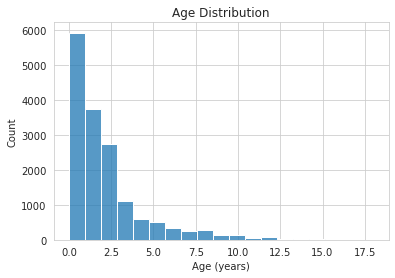

<Figure size 576x288 with 0 Axes>

In [48]:
_ = sns.histplot( x=  df['age_upon_outcome_(years)'], bins=19)
plt.figure(figsize=(8, 4))
_.set(title = 'Age Distribution', xlabel='Age (years)', )
plt.show()

In [41]:
df.shape

(16008, 18)

In [42]:
#animal IDs have duplicates.. are they the same dog or is this a mistake?
duplicates = df[df['animal_id_intake'].duplicated(keep=False)==True]
duplicates.head() #they are the same dog--I will keep the duplicates because they were adopted


,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,time_in_shelter_days,new_breed,new_color,intake_cond_int,intake_type_int,sex_upon_outcome_int
204,Adoption,A378348,9.0,2014-04-23 07:43:00,2014-04,Dog,Normal,Owner Surrender,Neutered Male,9.0,2014-01-25 14:38:00,2014-01,87.711806,German Shepherd,Black,0,0,0
205,Adoption,A378348,9.0,2014-01-19 13:39:00,2014-01,Dog,Normal,Owner Surrender,Neutered Male,9.0,2013-12-12 11:07:00,2013-12,38.105556,German Shepherd,Black,0,0,0
231,Adoption,A390222,9.0,2013-12-15 17:10:00,2013-12,Dog,Normal,Owner Surrender,Spayed Female,9.0,2013-12-08 17:04:00,2013-12,7.004167,Jack Russell Terrier,White,0,0,1
232,Adoption,A390222,9.0,2013-12-08 15:16:00,2013-12,Dog,Normal,Owner Surrender,Spayed Female,9.0,2013-12-04 18:24:00,2013-12,3.869444,Jack Russell Terrier,White,0,0,1
319,Adoption,A438287,14.0,2018-01-13 17:54:00,2018-01,Dog,Normal,Owner Surrender,Spayed Female,14.0,2018-01-08 12:03:00,2018-01,5.243750,Chihuahua Shorthair,Tan,0,0,1


In [43]:
#breed and color coulmns to int (for visualizations)
new_breed_int = df['new_breed'].unique().tolist()
create_dict(new_breed_int)
df['new_breed_int']=df['new_breed'].map(create_dict(new_breed_int))

new_color_int = df['new_color'].unique().tolist()
create_dict(new_color_int)
df['new_color_int']=df['new_color'].map(create_dict(new_color_int))
df.head()

,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,time_in_shelter_days,new_breed,new_color,intake_cond_int,intake_type_int,sex_upon_outcome_int,new_breed_int,new_color_int
12,Adoption,A200922,16.0,2013-11-22 09:44:00,2013-11,Dog,Normal,Owner Surrender,Neutered Male,16.0,2013-10-03 15:47:00,2013-10,49.747917,Dachshund,Black,0,0,0,0,0
14,Adoption,A210457,17.0,2016-10-07 12:34:00,2016-10,Dog,Aged,Public Assist,Neutered Male,17.0,2016-09-28 12:05:00,2016-09,9.020139,Chihuahua Shorthair,Tan,1,1,0,1,1
22,Adoption,A226069,15.0,2015-10-29 15:00:00,2015-10,Dog,Normal,Stray,Neutered Male,15.0,2015-10-06 12:29:00,2015-10,23.104861,Labrador Retriever,Sable,0,2,0,2,2
32,Adoption,A249087,15.0,2016-11-15 10:37:00,2016-11,Dog,Normal,Stray,Spayed Female,15.0,2016-08-17 14:05:00,2016-08,89.855556,German Shepherd,Black,0,2,1,3,0
48,Adoption,A274546,11.0,2013-11-16 12:24:00,2013-11,Dog,Normal,Stray,Spayed Female,11.0,2013-11-13 18:16:00,2013-11,2.755556,Pointer,Tricolor,0,2,1,4,3


In [44]:
df.columns

Index(['outcome_type', 'animal_id_intake', 'age_upon_outcome_(years)',
       'outcome_datetime', 'outcome_monthyear', 'animal_type',
       'intake_condition', 'intake_type', 'sex_upon_outcome',
       'age_upon_intake_(years)', 'intake_datetime', 'intake_monthyear',
       'time_in_shelter_days', 'new_breed', 'new_color', 'intake_cond_int',
       'intake_type_int', 'sex_upon_outcome_int', 'new_breed_int',
       'new_color_int'],
      dtype='object')

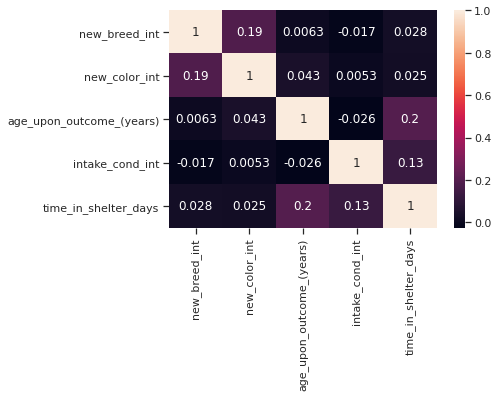

In [45]:
#heatmap looking for any correlated data
plot_data = df[['new_breed_int', 'new_color_int','age_upon_outcome_(years)', 'intake_cond_int', 'time_in_shelter_days']]
sns.set_theme(style="ticks")

sns.heatmap(plot_data.corr(), annot=True) 
#looks like age and time in shelter have slight correlation
#breed and color also have a slight correlation--to be expected

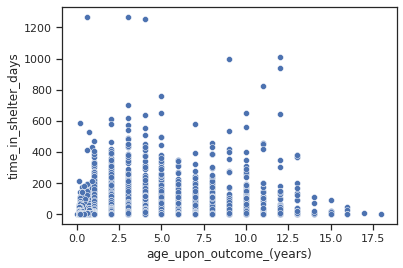

In [46]:
sns.scatterplot(x = df['age_upon_outcome_(years)'], y=df['time_in_shelter_days'])

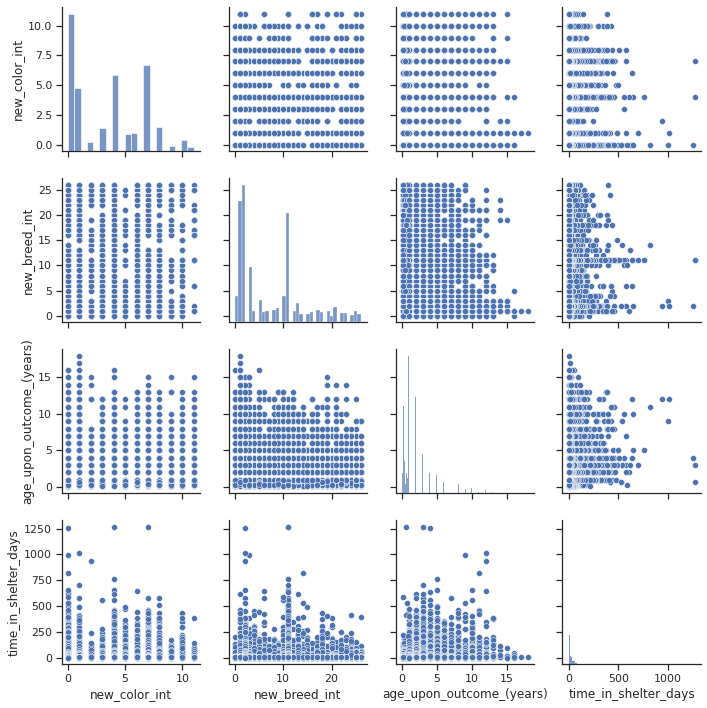

In [47]:
plot_data = df[['outcome_type', 'new_color_int', 'new_breed_int','age_upon_outcome_(years)', 'time_in_shelter_days']]
sns.set_theme(style="ticks")

sns.pairplot(plot_data)

In [48]:
#create dummy variables
df = pd.get_dummies(df, columns=['new_breed', 'new_color'], prefix=['breed', 'color'])


In [49]:
df.columns

Index(['outcome_type', 'animal_id_intake', 'age_upon_outcome_(years)',
       'outcome_datetime', 'outcome_monthyear', 'animal_type',
       'intake_condition', 'intake_type', 'sex_upon_outcome',
       'age_upon_intake_(years)', 'intake_datetime', 'intake_monthyear',
       'time_in_shelter_days', 'intake_cond_int', 'intake_type_int',
       'sex_upon_outcome_int', 'new_breed_int', 'new_color_int',
       'breed_Anatol Shepherd', 'breed_Australian Cattle Dog',
       'breed_Australian Kelpie', 'breed_Australian Shepherd', 'breed_Beagle',
       'breed_Black Mouth Cur', 'breed_Border Collie', 'breed_Boxer',
       'breed_Cairn Terrier', 'breed_Catahoula', 'breed_Chihuahua Longhair',
       'breed_Chihuahua Shorthair', 'breed_Dachshund', 'breed_German Shepherd',
       'breed_Great Pyrenees', 'breed_Jack Russell Terrier',
       'breed_Labrador Retriever', 'breed_Miniature Poodle',
       'breed_Miniature Schnauzer', 'breed_Pit Bull', 'breed_Plott Hound',
       'breed_Pointer', 'breed_

In [50]:
df['age_upon_intake_(years)'].value_counts()

1.0     3686
2.0     2743
0.1     1468
0.2     1463
3.0     1118
0.7      702
4.0      585
0.3      524
0.4      520
5.0      508
0.6      355
6.0      340
0.5      339
0.0      315
7.0      260
8.0      252
0.8      209
0.9      161
10.0     147
9.0      140
12.0      74
11.0      52
13.0      21
15.0      12
14.0       8
16.0       4
17.0       1
18.0       1
Name: age_upon_intake_(years), dtype: int64

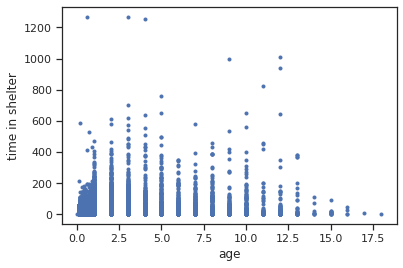

In [51]:
a = df[df['outcome_type'] == 'Adoption']['age_upon_outcome_(years)']
data = df[df['outcome_type'] == 'Adoption'] ['time_in_shelter_days']
plt.plot(a, data, marker = '.', linestyle='none')
plt.xlabel('age')
plt.ylabel('time in shelter')
plt.show()

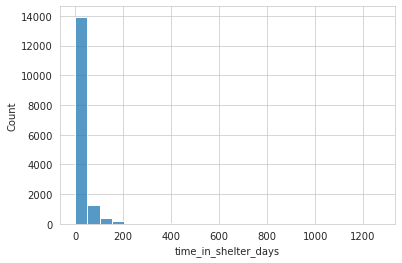

In [55]:
sns.histplot(data=df, x = 'time_in_shelter_days')

In [53]:
df[['intake_type_int', 'sex_upon_outcome_int']].head()

,intake_type_int,sex_upon_outcome_int
12,0,0
14,1,0
22,2,0
32,2,1
48,2,1


In [54]:
df.to_csv('dog_adoption2')